In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('Data/covid-19.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13999 entries, 0 to 13998
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         13999 non-null  int64  
 1   state                        13999 non-null  object 
 2   positive                     13866 non-null  float64
 3   probableCases                4302 non-null   float64
 4   negative                     13697 non-null  float64
 5   pending                      1539 non-null   float64
 6   totalTestResultsSource       13999 non-null  object 
 7   totalTestResults             13964 non-null  float64
 8   hospitalizedCurrently        10977 non-null  float64
 9   hospitalizedCumulative       8116 non-null   float64
 10  inIcuCurrently               6463 non-null   float64
 11  inIcuCumulative              2352 non-null   float64
 12  onVentilatorCurrently        5305 non-null   float64
 13  onVentilatorCumu

In [4]:
df.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201107,AK,19306.0,NaN,728589.0,NaN,totalTestsViral,747288.0,105.0,NaN,...,747895,0,0,f2176e93601204643e0618a661e7c3603f44f432,0,0,0,0,0,NaN
1,20201107,AL,202482.0,30709.0,1224595.0,NaN,totalTestsViral,1396368.0,1015.0,21294.0,...,1427077,33,0,4c80b4082d47d6d01b881c81b3397bb4f036f9ce,0,0,0,0,0,NaN
2,20201107,AR,120828.0,10812.0,1308477.0,NaN,totalTestsViral,1418493.0,633.0,7415.0,...,1429305,12,14,30d303737381a25b77c99cf23ce2a52f4b84dd0b,0,0,0,0,0,NaN
3,20201107,AS,0.0,NaN,1768.0,NaN,totalTestsViral,1768.0,NaN,NaN,...,1768,0,0,7cf6742686782861fc227cdfdf907974b32a1cc4,0,0,0,0,0,NaN
4,20201107,AZ,257384.0,6590.0,1608041.0,NaN,totalTestsPeopleViral,1858835.0,1139.0,22170.0,...,1865425,38,152,376dee695ec8a1ac1713c092686ce48674568ba6,0,0,0,0,0,NaN


#### Changed date column to date data type

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [6]:
#Sorted the data ascending order by date
df = df.sort_values('date').reset_index(drop=True)

In [7]:
df.tail()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
13994,2020-11-07,NE,80693.0,NaN,540839.0,NaN,totalTestsViral,1021846.0,748.0,3246.0,...,621532,27,45,7f157d0fd985b847ce62efd23edfb281a68191ce,0,0,0,0,0,NaN
13995,2020-11-07,ND,53204.0,NaN,254767.0,NaN,totalTestEncountersViral,894384.0,374.0,1858.0,...,307971,0,41,17dead717a4326d20a90df5b1fd113bc2a91bc01,0,0,0,0,0,NaN
13996,2020-11-07,NC,291245.0,13045.0,4032911.0,NaN,posNeg,4324156.0,1196.0,NaN,...,4324156,23,0,721f4c125cd38cc0faa0bfc7a2246f963d5b570e,0,0,0,0,0,NaN
13997,2020-11-07,MS,125885.0,17959.0,837208.0,NaN,posNeg,963093.0,710.0,6728.0,...,963093,14,0,3f1f42217410bc6d313f376430c08aa5eba54b5e,0,0,0,0,0,NaN
13998,2020-11-07,AK,19306.0,NaN,728589.0,NaN,totalTestsViral,747288.0,105.0,NaN,...,747895,0,0,f2176e93601204643e0618a661e7c3603f44f432,0,0,0,0,0,NaN


In [8]:
df[df['deathIncrease'] < 0][['state','date','death','deathIncrease']]

,state,date,death,deathIncrease
789,MD,2020-03-17,NaN,-2
1881,VA,2020-04-05,51.0,-1
1975,DC,2020-04-07,22.0,-2
2820,AR,2020-04-22,42.0,-1
2898,PA,2020-04-23,1421.0,-201
2913,KS,2020-04-24,111.0,-1
2949,TN,2020-04-24,168.0,-2
2952,RI,2020-04-24,202.0,-11
3042,CO,2020-04-26,672.0,-2
3182,NE,2020-04-28,55.0,-1


In [9]:
### After google search I got conclusion that filling negative numbers with 0s is the best decision. Total death numbers are correct.
df['deathIncrease'] = np.where(df['deathIncrease'] < 0, 0,df['deathIncrease']) 
### The same thing for positive increase
df['positiveIncrease'] = np.where(df['positiveIncrease'] < 0, df['positiveIncrease'] * (-1) ,df['positiveIncrease']) 

#### Dropped the columns that I don't need

In [10]:
cols = [3,5,6,9,10,11,12,13,15,16,17,18,21,28,29,30,31,32,33,34,35,36,37,38,39,40,43,45,48,49,50,51,52,53,54]
df_upd = df.drop(df.columns[cols],axis=1)
df_upd = df_upd.fillna(0)
df_upd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13999 entries, 0 to 13998
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      13999 non-null  datetime64[ns]
 1   state                     13999 non-null  object        
 2   positive                  13999 non-null  float64       
 3   negative                  13999 non-null  float64       
 4   totalTestResults          13999 non-null  float64       
 5   hospitalizedCurrently     13999 non-null  float64       
 6   recovered                 13999 non-null  float64       
 7   death                     13999 non-null  float64       
 8   hospitalized              13999 non-null  float64       
 9   totalTestsViral           13999 non-null  float64       
 10  positiveTestsViral        13999 non-null  float64       
 11  negativeTestsViral        13999 non-null  float64       
 12  positiveCasesViral

In [11]:
### Adding new columns
#Daily Fatility Rate
df_upd['fatalityRate'] = np.where(df_upd['positiveIncrease'] == 0, 0,
                                   df_upd['deathIncrease'] / df_upd['positiveIncrease']) 
#Daily Hospitalization per 100000 people
df_upd['hospitalizationPer100k'] = df_upd['hospitalizedIncrease'] / 100000

In [12]:
df_upd.tail()

,date,state,positive,negative,totalTestResults,hospitalizedCurrently,recovered,death,hospitalized,totalTestsViral,...,positiveCasesViral,deathConfirmed,deathProbable,positiveIncrease,negativeIncrease,totalTestResultsIncrease,deathIncrease,hospitalizedIncrease,fatalityRate,hospitalizationPer100k
13994,2020-11-07,NE,80693.0,540839.0,1021846.0,748.0,47259.0,701.0,3246.0,1021846.0,...,80693.0,0.0,0.0,2681,4808,21621,27,45,0.010071,0.00045
13995,2020-11-07,ND,53204.0,254767.0,894384.0,374.0,42251.0,480.0,1858.0,933398.0,...,53204.0,475.0,5.0,1602,704,9652,0,41,0.000000,0.00041
13996,2020-11-07,NC,291245.0,4032911.0,4324156.0,1196.0,246318.0,4605.0,0.0,4311111.0,...,278200.0,4511.0,94.0,2676,44104,46780,23,0,0.008595,0.00000
13997,2020-11-07,MS,125885.0,837208.0,963093.0,710.0,105839.0,3433.0,6728.0,942578.0,...,107926.0,3070.0,363.0,1031,0,1031,14,0,0.013579,0.00000
13998,2020-11-07,AK,19306.0,728589.0,747288.0,105.0,7157.0,84.0,0.0,747288.0,...,19306.0,84.0,0.0,607,-34013,-34013,0,0,0.000000,0.00000


#### Grouped by States

In [13]:
state_grouped = df_upd.groupby(['date','state'])['positive','negative','hospitalized','death','deathIncrease','positiveIncrease','fatalityRate','hospitalizationPer100k'].sum().reset_index()
state_grouped.tail()

/home/hilmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,date,state,positive,negative,hospitalized,death,deathIncrease,positiveIncrease,fatalityRate,hospitalizationPer100k
13994,2020-11-07,VT,2347.0,191176.0,0.0,59.0,1,21,0.047619,0.00000
13995,2020-11-07,WA,114241.0,2454016.0,8791.0,2439.0,8,1691,0.004731,0.00007
13996,2020-11-07,WI,277503.0,1908320.0,12727.0,2381.0,48,7521,0.006382,0.00173
13997,2020-11-07,WV,27742.0,809962.0,0.0,502.0,15,655,0.022901,0.00000
13998,2020-11-07,WY,16597.0,123769.0,505.0,105.0,0,192,0.000000,0.00006


### Created a weekly dataframe

In [14]:
df_upd['date'] = pd.to_datetime(df['date']) - pd.to_timedelta(7, unit='d')
weekly = df_upd.groupby(['state', pd.Grouper(key='date', freq='W-MON')])['positive','negative','death','positiveIncrease','deathIncrease'].sum().reset_index().sort_values('date')

/home/hilmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [15]:
## Added new columns for weekly dataframe
weekly= weekly.reset_index(drop=True)
weekly['weekly_fr'] = np.where(weekly['positiveIncrease'] == 0, 0,
                                   weekly['deathIncrease'] / weekly['positiveIncrease']) 
weekly['pst_per100k'] = weekly['positive'] / 100000
weekly['death_per100k'] = weekly['death'] / 100000 
weekly.tail()

,state,date,positive,negative,death,positiveIncrease,deathIncrease,weekly_fr,pst_per100k,death_per100k
2034,MO,2020-11-02,985596.0,6803265.0,15539.0,16880,119,0.007050,9.85596,0.15539
2035,GA,2020-11-02,1841340.0,16503931.0,42834.0,8904,648,0.072776,18.41340,0.42834
2036,AL,2020-11-02,996060.0,6051357.0,15150.0,7590,109,0.014361,9.96060,0.15150
2037,MS,2020-11-02,618410.0,4186040.0,17038.0,5020,85,0.016932,6.18410,0.17038
2038,WY,2020-11-02,78074.0,611776.0,513.0,2430,18,0.007407,0.78074,0.00513


In [108]:
### I got list of the democratic and republican states

rep = ['AL','AK','AZ','AR','FL','GA','ID','IN','IA','MD','MA','MS','MO','NE','NH','ND','OH','OK','SC','SD','TN','TX','UT','VT','WV','WY']
dem = ['WI','VA','WA','OR','PA','RI','NJ','NY','NM','NC','NV','MT','CA','MN','MI','KS','KY','LA','ME','IL','CO','CT','DE','HI','DC']

weekly_rep = weekly[weekly['state'].isin(rep)]['weekly_fr']
weekly_dem = weekly[weekly['state'].isin(dem)]['weekly_fr']

daily_rep = state_grouped[state_grouped['state'].isin(rep)]['fatalityRate']
daily_dem = state_grouped[state_grouped['state'].isin(dem)]['fatalityRate']

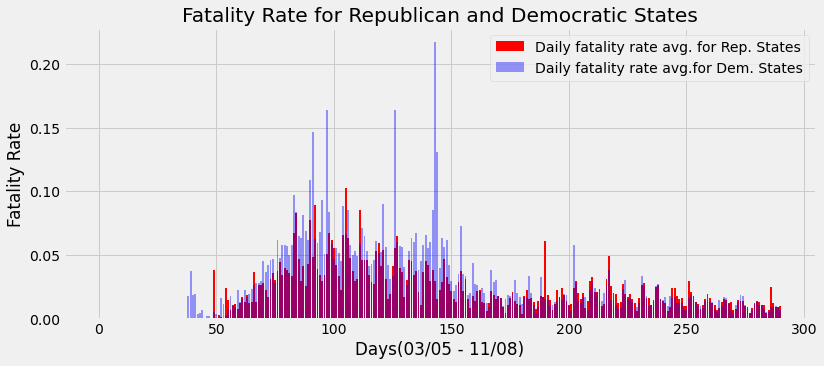

In [17]:
rp_ = df_upd[df_upd['state'].isin(rep)].groupby('date').mean()
dm_ = df_upd[df_upd['state'].isin(dem)].groupby('date').mean()
rp_death = rp_['fatalityRate']
dm_death = dm_['fatalityRate']
bins = np.arange(291)
fig,ax=plt.subplots(figsize=(12,5))
ax.bar(bins,rp_death,label='Daily fatality rate avg. for Rep. States',color='red')
ax.bar(bins,dm_death,label='Daily fatality rate avg.for Dem. States',color='blue',alpha=0.4)
ax.set_xlabel('Days(03/05 - 11/08)')
ax.set_ylabel('Fatality Rate')
ax.set_title('Fatality Rate for Republican and Democratic States')
plt.legend()
plt.savefig('DAILY_avg_death_pol.png')
plt.show()

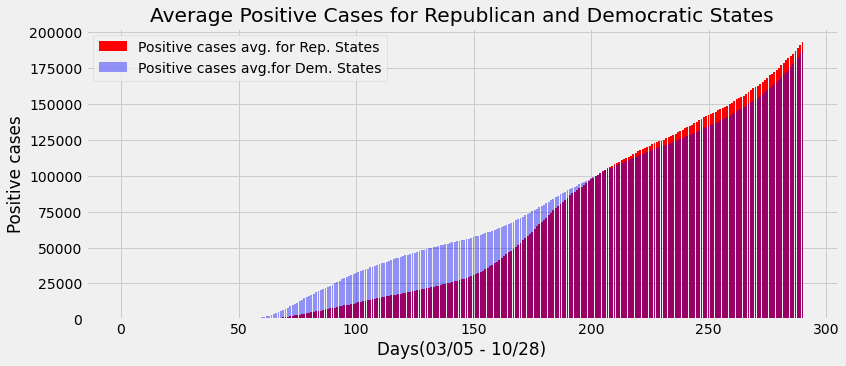

In [18]:
rp_ = df_upd[df_upd['state'].isin(rep)].groupby('date').mean()
dm_ = df_upd[df_upd['state'].isin(dem)].groupby('date').mean()
rp_death = rp_['positive']
dm_death = dm_['positive']
bins = np.arange(291)
fig,ax=plt.subplots(figsize=(12,5))
ax.bar(bins,rp_death,label='Positive cases avg. for Rep. States',color='red')
ax.bar(bins,dm_death,label='Positive cases avg.for Dem. States',color='blue',alpha=0.4)
ax.set_xlabel('Days(03/05 - 10/28)')
ax.set_ylabel('Positive cases')
ax.set_title('Average Positive Cases for Republican and Democratic States')
plt.legend()
plt.savefig('total_pos_pol.png')
plt.show()

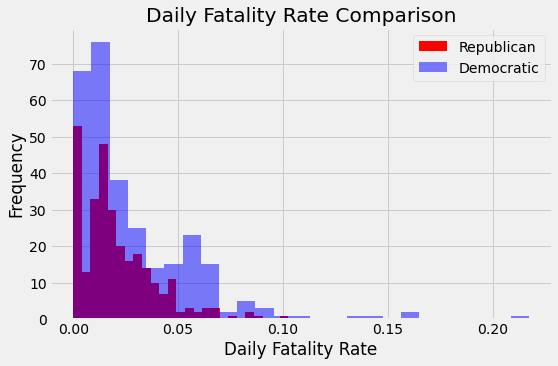

In [19]:
rp_ = df_upd[df_upd['state'].isin(rep)].groupby('date').mean()
dm_ = df_upd[df_upd['state'].isin(dem)].groupby('date').mean()
rp_death = rp_['fatalityRate']
dm_death = dm_['fatalityRate']
fig, ax = plt.subplots(figsize=(8,5))
ax.hist(rp_death, bins=25, color = 'red',label='Republican')
ax.hist(dm_death, bins=25, color = 'blue', label='Democratic',alpha=0.5)
plt.legend()
plt.title('Daily Fatality Rate Comparison')
plt.xlabel('Daily Fatality Rate')
plt.ylabel('Frequency')
plt.savefig('Daily-Fatality-Rate-pol.png')
plt.show()

In [20]:
weekly_rep = weekly[weekly['state'].isin(rep)]
weekly_dem = weekly[weekly['state'].isin(dem)]

In [29]:
alt.data_transformers.disable_max_rows()
alt.Chart(weekly_rep).mark_circle().encode(
    x='monthdate(date):O',
    y='state',
    color='state',
    size=alt.Size('weekly_fr:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='The Rep. States Weekly Fatality Rate')
    ) 
).properties(
    width=800,
    height=800
)

alt.Chart(...)

In [30]:
alt.data_transformers.disable_max_rows()
alt.Chart(weekly_dem).mark_circle().encode(
    x='monthdate(date):O',
    y='state',
    color='state',
    size=alt.Size('weekly_fr:Q',
        scale=alt.Scale(range=[0, 1000]),
        legend=alt.Legend(title='The Rep. States Weekly Fatality Rate')
    ) 
).properties(
    width=800,
    height=800
)

alt.Chart(...)

In [102]:
bar = alt.Chart(weekly_dem).mark_bar().encode(
        x='monthdate(date):O',
        y="mean(positiveIncrease):Q")

rule = alt.Chart(weekly_dem).mark_rule(color='red').encode(
    y='mean(positiveIncrease):Q'
)

(bar+rule).properties(width=600)

alt.LayerChart(...)

In [80]:
bar = alt.Chart(weekly_dem).mark_bar().encode(
        x='monthdate(date):O',
        y="deathIncrease:Q")

line =  bar.mark_rule(color='black').encode(
    y='mean(deathIncrease):Q'
)

(bar+line).properties(width=600)

alt.LayerChart(...)

### Statistical Test

- Null Hypothesis: The republican and democratic states have the same fatality rate.
- Alternative Hypothesis:The republican and democratic states don't have the same fatality rate.


In [109]:
def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [110]:
def welch_satterhwaithe_df(sample_1, sample_2):
    ss1 = len(sample_1)
    ss2 = len(sample_2)
    df = (
        ((np.var(sample_1)/ss1 + np.var(sample_2)/ss2)**(2.0)) / 
        ((np.var(sample_1)/ss1)**(2.0)/(ss1 - 1) + (np.var(sample_2)/ss2)**(2.0)/(ss2 - 1))
    )
    return df

In [111]:
daily_rep = state_grouped[state_grouped['state'].isin(rep)]['fatalityRate']
daily_dem = state_grouped[state_grouped['state'].isin(dem)]['fatalityRate']

In [112]:
pol_statistic = welch_test_statistic(daily_rep,daily_dem)
print("Welch Test Statistic: {:2.2f}".format(pol_statistic))

Welch Test Statistic: -6.26


In [113]:
dof_pol = welch_satterhwaithe_df(daily_rep, daily_dem)
print("Degrees of Freedom for Welch's Test: {:2.2f}".format(dof_pol))

Degrees of Freedom for Welch's Test: 9010.51


Text(0.5, 1.0, "Distribution of Welch's Test Statistic Under the Null Hypothesis")

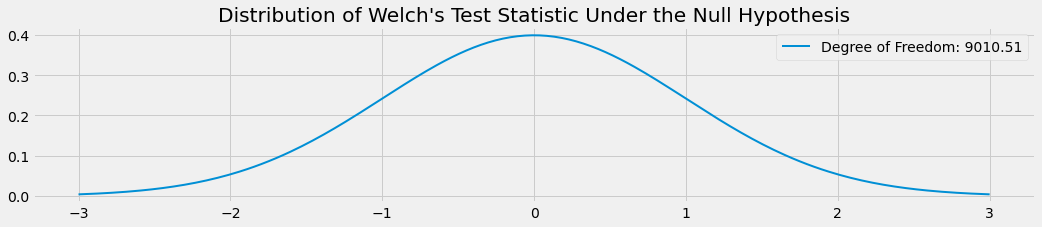

In [114]:
x = np.linspace(-3, 3, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(dof_pol)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(dof_pol))
ax.legend()
ax.set_title("Distribution of Welch's Test Statistic Under the Null Hypothesis")

Text(0.5, 1.0, 'p-value Region')

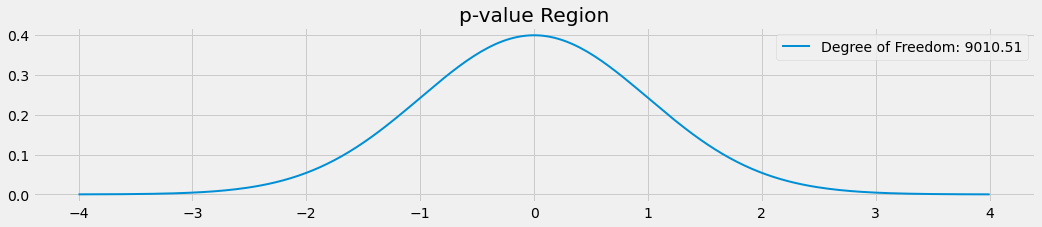

In [115]:
x = np.linspace(-4, 4, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(dof_pol)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(dof_pol))
_ = ax.fill_between(x, students.pdf(x), where=(x >= -pol_statistic), color="red", alpha=0.25)
_ = ax.fill_between(x, students.pdf(x), where=(x <= pol_statistic), color="red", alpha=0.25)
ax.legend()
ax.set_title("p-value Region")

In [116]:
p_value = students.cdf(pol_statistic) + (1 - students.cdf(-pol_statistic))
print("p-value : {}".format(p_value))

p-value : 3.9299762233412516e-10
